## learning-AI101 : MNIST classification (DNN)
- 혼자 공부하는 머신러닝과 딥러닝 : 367p~391p
- 2024.07.30.
----

### DNN

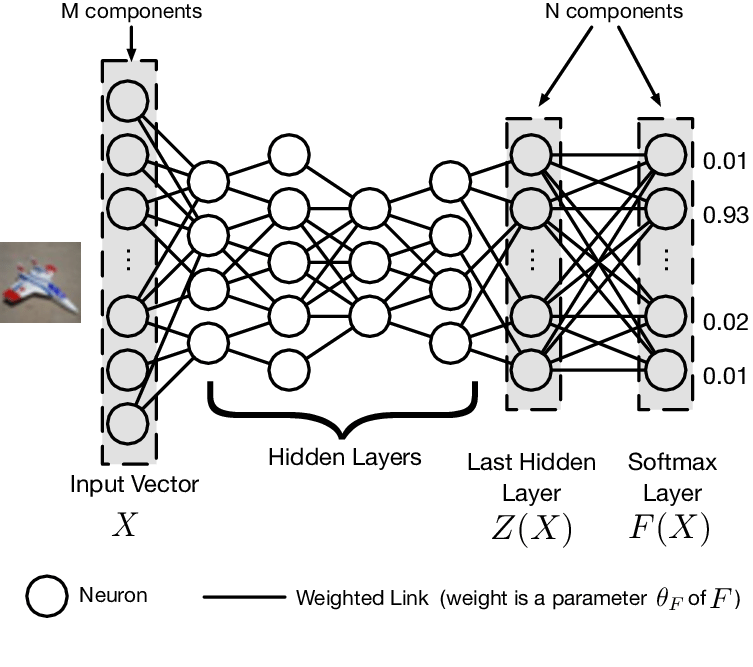

- ANN과 비교 
    - DNN은 hidden layer의 도입으로 인하여 model parameter가 무수히 증가한 network 모형
        - model parameter가 늘었다 -> 패턴을 더 자세히 찾을 수 있다 -> 학습강도가 높아짐 (복잡성도 높아짐)
    - full connected에서 relative connected로의 발전 
- hidden layer
    - hidden layer에서도 activation function이 존재하며, 무엇을 지정할 지는 자유 (보통은 sigmoid, relu, tanh를 사용)
        - 선형적으로만 산술 계산을 진행하면 중간에 사라지는 parameter가 존재하여 학습의 의미가 없음
        - 따라서 각 뉴런마다 activation function을 지정하여 선형적인 연산 결과를 비선형적으로 twist 후 다음 노드에 전달
        - (일반적으로) hidden layer의 노드 갯수는 output layer의 노드 갯수보다 많아야 함 
        - activation function at hidden layer
            - https://heytech.tistory.com/388
            - sigmoid
                - 다중선형회귀에서 Y가 범주형일 때의 문제를 해결하고자 확률로 변환하도록 도입한 함수
                - sigmoid로 z값을 0~1 사이로 압축 가능
            - relu
                - sigmoid의 정의역이 음의 무한대, 양의 무한대로 갈 수록 출력을 만드는데 신속한 대응이 어려워 도입한 함수
                - tanh와 sigmoid의 기울기 소실로 인한 문제를 해결하고자 도입
                - 입력이 양수면 입력을 그대로 통과, 음수면 0 
- 기본적으로 minibatch gradient descent 방식을 사용함, batch_size로 기본 미니배치 크기 (32)를 변경 가능
- optimizer를 이용하여 경사하강법의 방식을 변경 가능
    - 기본 경사 하강법 : learning rate를 변화하지 않는 방식
        - SGD : 기본적인 minibatch
        - momentum : SGD에서 momentum parameter를 추가, 0.9 이상을 지정
        - nesterov : SGD에서 momentum과 nesterov paramter를 추가
    - 적응형 경사 하강법 : learning rate를 변화하는 방식 (안정적으로 극소에 수렴)
        - Adam
        - adagrad
        - rmsprop
        
------

<br>

### API 및 하이퍼파라미터 정리

- modelling
    - keras.Sequential() 
        - parameter로 리스트 형태로 layer 추가
        - add() 메소드로 layer 추가
    - keras.layers.Flatten() 
        - n차원 데이터를 1차원으로 변경
        - input_shape parameter로 입력층으로 들어오는 데이터의 사이즈를 tuple 형식으로 넣어줌
    - keras.layers.Dense()
        - param 1 : node 갯수
        - param 2 : activation
            - relu
            - tanh
            - sigmoid
        - param 3 : name
        - 만약 첫번째 dense라면 input_shape 지정해줘야함
- compile 
    - loss
        - 이진 분류 : binary_crossentropy
        - 다중 분류 (target이 one-hot encoding 되어있음) : categorical_crossentropy
        - 다중 분류 (target이 one-hot encoding 되어있지 않음) : sparse_categorical_crossentropy
    - optimizer
        - keras.optimizers.SGD()
            - learning_rate
            - momentum
            - nesterov
        - adam
        - adagrad
        - rmsprop
    - metrics
        - accuracy
    - batch_size
- fit
    - epochs 
- predict
- evaluate
- summary

In [1]:
# MNIST 데이터셋 가져오기

from keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()
print(X_train.shape, X_test.shape)

2024-07-30 15:55:10.632054: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


(60000, 28, 28) (10000, 28, 28)


In [2]:
# train set, test set을 scaling

X_train_scaled = X_train / 255.0 # 0~1 사이의 값으로 정규화하는 것 (numpy니깐 이게 가능함)
X_train_scaled_rs = X_train.reshape(-1, 28*28)

X_test_scaled = X_test / 255.0 # 0~1 사이의 값으로 정규화하는 것 (numpy니깐 이게 가능함)
X_test_scaled_rs = X_test.reshape(-1, 28*28)

# 이따가 flatten 층을 사용하여서도 test

In [3]:
# 딥러닝을 도입하여 학습을 진행
# 먼저 X_train_scaled를 다시 X_train_scaled와 X_val_scaled로 나눔, 추후 val은 evaluate에 사용할 예정

from sklearn.model_selection import train_test_split

X_train_scaled, X_val_scaled, y_train_scaled, y_val_scaled = train_test_split(X_train_scaled, y_train,
                                                               test_size=0.2)

X_train_scaled_rs, X_val_scaled_rs, y_train_rs, y_val_rs = train_test_split(X_train_scaled_rs, y_train,
                                                               test_size=0.2)

print (X_train_scaled.shape, X_val_scaled.shape)

(48000, 28, 28) (12000, 28, 28)


#### model 1) flatten 없이 진행

In [4]:
# modelling

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(100, activation='sigmoid', input_shape=(784, )), 
    keras.layers.Dense(10, activation='softmax') # 마지막 layer
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# compile, fit

model.compile(loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled_rs, y_train_rs, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.8023 - accuracy: 0.7147
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.6054 - accuracy: 0.7766
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5727 - accuracy: 0.7910
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5482 - accuracy: 0.8023
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5432 - accuracy: 0.8050
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5364 - accuracy: 0.8098
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5217 - accuracy: 0.8146
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5205 - accuracy: 0.8173
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5165 - accuracy: 0.8167
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.509

In [8]:
# evaluate 

model.evaluate(X_val_scaled_rs, y_val_rs)

375/375 [==============================] - 0s 966us/step - loss: 0.5042 - accuracy: 0.8253


[0.5042362809181213, 0.8253333568572998]

#### model 2) flatten 층 포함하고 진행
- model 1이랑 성능 면에서 차이가 없다. (accuracy는 학습을 할 때마다 다름)
- 애초에 flatten layer는 n차원을 1차원으로 변환하는 layer이기 때문에 이 자체에 weight나 bias가 있지 않음

In [9]:
# modelling

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='sigmoid'), 
    keras.layers.Dense(10, activation='softmax') # 마지막 layer
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               78500     
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# compile, fit

model.compile(loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5698 - accuracy: 0.8068
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4120 - accuracy: 0.8506
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3770 - accuracy: 0.8641
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3527 - accuracy: 0.8719
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3365 - accuracy: 0.8778
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3234 - accuracy: 0.8836
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3104 - accuracy: 0.8856
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3006 - accuracy: 0.8910
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2908 - accuracy: 0.8943
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.282

In [13]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 901us/step - loss: 0.3144 - accuracy: 0.8917


[0.3143872320652008, 0.8916666507720947]

#### model 3) hidden layer의 activation에 relu 도입

In [14]:
# modelling

from tensorflow import keras

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'), 
    keras.layers.Dense(10, activation='softmax') # 마지막 layer
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# compile, fit

model.compile(loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.5337 - accuracy: 0.8100
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3965 - accuracy: 0.8594
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3598 - accuracy: 0.8702
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3388 - accuracy: 0.8783
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3227 - accuracy: 0.8841
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3094 - accuracy: 0.8902
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2998 - accuracy: 0.8932
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2888 - accuracy: 0.8974
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2839 - accuracy: 0.8992
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.276

In [16]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 877us/step - loss: 0.3947 - accuracy: 0.8852


[0.3947124481201172, 0.8852499723434448]

#### model 4) SGD optimizer 도입
- epochs를 20, learning_rate를 0.2로 하였더니 accuracy가 0.2에 수렴하는 상황이 발생
- 아무래도 learning_rate를 잘못 설정한 것 같아, random search를 돌리면 상황이 해결될 것 같긴 함

In [17]:
sgd = keras.optimizers.SGD(learning_rate=0.2)
model.compile(optimizer=sgd, loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2960 - accuracy: 0.8950
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2602 - accuracy: 0.9048
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2443 - accuracy: 0.9112
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2274 - accuracy: 0.9153
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2182 - accuracy: 0.9186
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2154 - accuracy: 0.9204
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2101 - accuracy: 0.9210
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2003 - accuracy: 0.9243
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1981 - accuracy: 0.9262
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.187

In [18]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 970us/step - loss: 0.3828 - accuracy: 0.8889


[0.3828323483467102, 0.8889166712760925]

#### model 5) SGD optimizer : momentum optimization

In [19]:
sgd = keras.optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd, loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1190 - accuracy: 0.9557
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1138 - accuracy: 0.9577
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1108 - accuracy: 0.9583
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1097 - accuracy: 0.9597
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1062 - accuracy: 0.9604
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1059 - accuracy: 0.9604
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1037 - accuracy: 0.9613
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1030 - accuracy: 0.9610
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1010 - accuracy: 0.9625
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.099

In [20]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 915us/step - loss: 0.4357 - accuracy: 0.8944


[0.4356854557991028, 0.8944166898727417]

#### model 6) SGD optimizer : nesterov momentum optimization

In [21]:
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled , epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0839 - accuracy: 0.9705
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0832 - accuracy: 0.9694
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0819 - accuracy: 0.9696
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0792 - accuracy: 0.9703
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0776 - accuracy: 0.9715
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0771 - accuracy: 0.9715
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0762 - accuracy: 0.9724
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0750 - accuracy: 0.9723
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0747 - accuracy: 0.9726
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.074

In [22]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 943us/step - loss: 0.5075 - accuracy: 0.8904


[0.5074700713157654, 0.89041668176651]

#### model 7) RMSprop

In [23]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0953 - accuracy: 0.9646
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0985 - accuracy: 0.9654
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.9655
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0968 - accuracy: 0.9648
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0954 - accuracy: 0.9655
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0966 - accuracy: 0.9669
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0943 - accuracy: 0.9667
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0957 - accuracy: 0.9670
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0945 - accuracy: 0.9664
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.092

In [24]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 880us/step - loss: 0.7478 - accuracy: 0.8899


[0.7478209733963013, 0.8899166584014893]

#### model 8) adagrad

In [25]:
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0424 - accuracy: 0.9855
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0336 - accuracy: 0.9889
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0317 - accuracy: 0.9898
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0310 - accuracy: 0.9899
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0304 - accuracy: 0.9899
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0300 - accuracy: 0.9902
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0297 - accuracy: 0.9902
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0295 - accuracy: 0.9903
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0293 - accuracy: 0.9905
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.029

In [26]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 877us/step - loss: 0.6539 - accuracy: 0.8953


[0.6538537740707397, 0.8953333497047424]

#### model 9) adam

In [28]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics='accuracy')
model.fit (X_train_scaled, y_train_scaled, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1070 - accuracy: 0.9634
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1012 - accuracy: 0.9641
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0976 - accuracy: 0.9654
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0990 - accuracy: 0.9651
Epoch 5/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0976 - accuracy: 0.9658
Epoch 6/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.9661
Epoch 7/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0921 - accuracy: 0.9677
Epoch 8/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0963 - accuracy: 0.9660
Epoch 9/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0847 - accuracy: 0.9694
Epoch 10/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.087

In [29]:
# evaluate 

model.evaluate(X_val_scaled, y_val_scaled)

375/375 [==============================] - 0s 890us/step - loss: 0.6383 - accuracy: 0.8899


[0.6383181810379028, 0.8899166584014893]

<br>

--------

### deep learning에서 overfitting 시 대처법

- optimizer tuning
    - RMSprop에서 overfitting이 발생하였다 -> adam으로 시도해볼 것 (적응형 경사하강법)
- dropout
    - hidden layer에 배치, 배치된 dropout 층 앞에 있는 layer의 일부 노드를 dropout (출력을 랜덤하게 0으로 만듦)
    - 장점 : 특정 노드에 모델이 의존되지 않도록 할 수 있음 + 조금 더 신중히 학습 
    - 순서
        - dropout 배치 -> 학습
        - validation set의 loss와 train set의 loss를 시각화한 자료에서 validation loss가 상승하는 지점을 확인
        - epoch만큼 다시 학습
- callback
    - ModelCheckpoint
        - 에포크마다 모델 저장
        - save_best_only=True : 가장 오차가 낮은 모델을 저장 가능
        - 학습을 1번만 할 수 있어서 편리
    - EarlyStopping
        - **조기 종료**, overfitting이 시작되기 전 훈련 미리 중지
        - patience : n번 연속 검증 점수가 향상되지 않을 시 훈련 중지
        - best_weights=True : 가장 낮은 검증 손실을 낸 모델파라미터 되돌림 (epoch는 stopped_epoch에서 확인 가능)

#### model 10) optimizer tuning

In [35]:
# fit할 시에 history를 반환, history.history에 loss, accuracy 들어있음 (epoch마다의 loss, accuracy)
# validation_data 파라미터를 지정하여 validation score까지 epoch마다 출력 및 history에 저장 가능

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train_scaled, epochs=20, validation_data=(X_val_scaled, y_val_scaled))

print (history.history)

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5314 - accuracy: 0.8142 - val_loss: 0.4231 - val_accuracy: 0.8471
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3933 - accuracy: 0.8581 - val_loss: 0.3641 - val_accuracy:

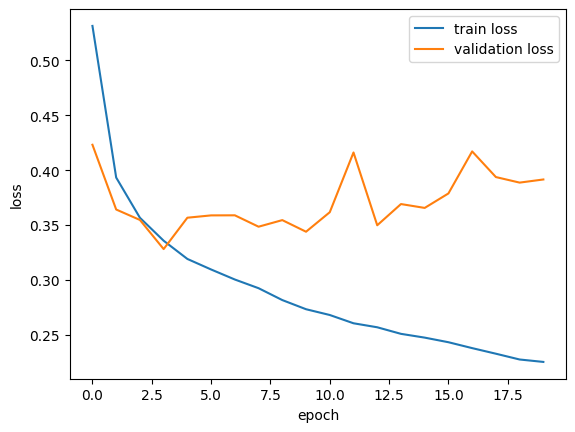

In [36]:
# matplotlib으로 validation loss, train loss 시각화

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])

plt.show()

현재 위 그래프에서 validation loss가 epoch 6일때 다시 상승하고 있다. 만약 validation loss가 상승하는 저 point를 가능한 뒤로 늦춘다면 loss를 줄이고 accuracy를 올릴 수 있을 것. 따라서 **optimizer를 adam으로 변경 후 다시 학습을 진행해본다.**

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 100)               78500     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2241 - accuracy: 0.9188 - val_loss: 0.4021 - val_accuracy: 0.8782
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.2111 - accuracy: 0.9226 - val_loss: 0.3948 - val_accuracy:

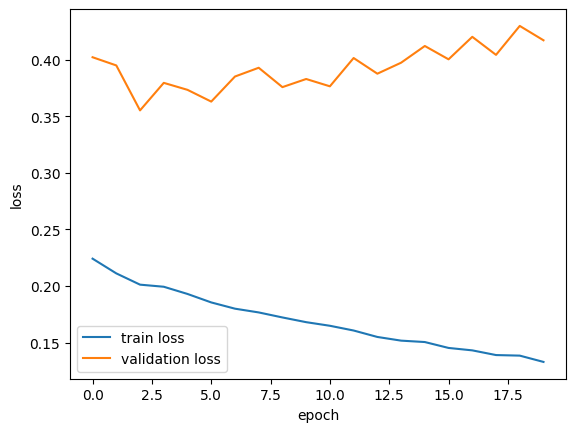

In [37]:
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train_scaled, epochs=20, validation_data=(X_val_scaled, y_val_scaled))

print (history.history)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])

plt.show()

**optimizer를 adam으로 변경 후 다시 학습을 진행해보니, 책에 나와있는 것과는 다른 결과가 나왔다. 오히려 loss가 증가하고 있는 기이한 현상이 나타났다.**

#### model 11) dropout

In [38]:
# dropout 0.3을 통하여 이전에 있는 hidden layer의 node의 출력 중 30%를 0으로 만든다.

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(10, activation='softmax')
])

model.summary()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train_scaled, epochs=20, validation_data=(X_val_scaled, y_val_scaled))

print (history.history)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_15 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5914 - accuracy: 0.7911 - val_loss: 0.4183 - val_accuracy: 0.8485
Epoc

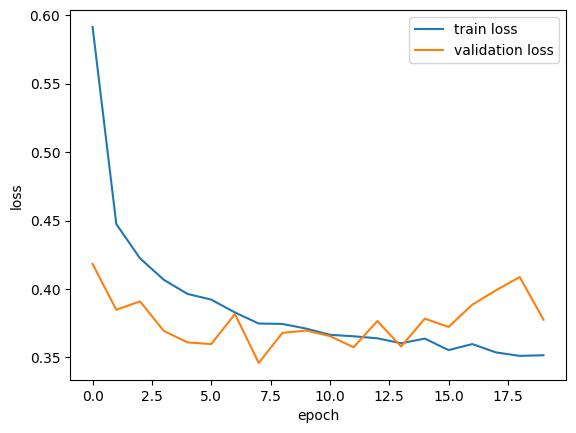

In [39]:
# matplotlib으로 validation loss, train loss 시각화

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss', 'validation loss'])

plt.show()

**dropout을 통하여 overfitting을 해결하였다.** 위 figure을 확인해보니, epoch 5에서 validation loss가 증가추세를 보이고 있음을 확인 결과, epoch 5에서 적합한 모델이 만들어짐을 알 수 있다.

In [40]:
# epoch 5로 다시 모델 학습

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train_scaled, y_train_scaled, epochs=5, validation_data=(X_val_scaled, y_val_scaled))
model.evaluate(X_val_scaled, y_val_scaled)

Epoch 1/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3529 - accuracy: 0.8856 - val_loss: 0.4096 - val_accuracy: 0.8791
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3476 - accuracy: 0.8869 - val_loss: 0.4087 - val_accuracy: 0.8844
Epoch 3/5
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3418 - accuracy: 0.8898 - val_loss: 0.4089 - val_accuracy: 0.8828
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3499 - accuracy: 0.8878 - val_loss: 0.4398 - val_accuracy: 0.8828
Epoch 5/5
375/375 [==============================] - 0s 883us/step - loss: 0.4077 - accuracy: 0.8864


[0.40774449706077576, 0.8864166736602783]

#### model 12) callback
- 조기종료를 이용하여 overfitting을 막는다.
- 조기종료는 EarlyStopping 메소드를 이용하여 구현하며, 이를 ModelCheckpoint 메소드와 함께 사용하면 가장 낮은 검증 손실 모델을 파일에 저장함과 동시에, 검증 손실이 다시 상승 시 훈련을 중지하는 기능을 구현 가능하다.

In [42]:
# ModelCheckpoint와 EarlyStopping 메소드를 차례대로 사용하여 구현

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./model/MNIST_DNN_model_best.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, 
                                                 restore_best_weights=True)

history = model.fit(X_train_scaled, y_train_scaled, epochs=20, 
                    validation_data=(X_val_scaled, y_val_scaled),
                   callbacks=[checkpoint_cb, early_stopping_cb])

print ("best epochs : ", early_stopping_cb.stopped_epoch)

Epoch 1/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3443 - accuracy: 0.8897 - val_loss: 0.4398 - val_accuracy: 0.8854
Epoch 2/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3385 - accuracy: 0.8919 - val_loss: 0.4601 - val_accuracy: 0.8829
Epoch 3/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3397 - accuracy: 0.8924 - val_loss: 0.4521 - val_accuracy: 0.8841
Epoch 4/20
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3414 - accuracy: 0.8906 - val_loss: 0.4570 - val_accuracy: 0.8862
best epochs :  3
